In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## 2.

a)

In [14]:
stats.binom.pmf(2,5,0.8) * 100

5.119999999999997

c)

In [5]:
# c)
p_at_least_4_partial = 1 - stats.binom.cdf(3, 5, 0.8) # x, n, p 4 oder 5 richtig
p_pass = 1 - stats.binom.cdf(3,6,p_at_least_4_partial)

In [6]:
p_pass

0.8099428436505378

d)

In [7]:
probabilities = [stats.binom.pmf(0, 5, 0.8), stats.binom.pmf(1, 5, 0.8), stats.binom.pmf(2, 5, 0.8),
                 stats.binom.pmf(3, 5, 0.8), stats.binom.pmf(4, 5, 0.8), stats.binom.pmf(5, 5, 0.8)]

In [8]:
total_probability_same_numer_of_subtasks_correct = 0
for prob in probabilities:
    total_probability_same_numer_of_subtasks_correct += prob ** 6

In [9]:
total_probability_same_numer_of_subtasks_correct

0.0060341115129170925

## 3.

In [56]:
# a) p that max 7800 of 400'000 with 2% probability
stats.binom.cdf(7800, 400000, 0.02)

0.1282884316142921

In [18]:
# b) p that at least 8100 of 400'000 with 2% probability
stats.binom.sf(8100, 400000, 0.02)

0.1282884316142921

In [63]:
# c)
b_std = stats.binom.std(400000, 0.02)
stats.binom.cdf(8000 + b_std, 400000, 0.02) - stats.binom.cdf(8000 - b_std, 400000, 0.02)

0.682452547107721

## 4.

In [68]:
a = 0.01
stats.norm.ppf(1 - a)

2.3263478740408408

## 5. Monte Carlo Simulation

In [24]:
runs = 10000000

In [25]:
revenues_higher_900 = []
revenues = filter(lambda x: x > 900, np.array(stats.norm.rvs(loc=1000, scale=150, size=runs)))

for rev in revenues:
    if not rev < 900:
        revenues_higher_900.append(rev)

np.mean(revenues_higher_900)

1064.0381499649025

In [26]:
np.mean([x for x in stats.norm.rvs(loc=1000, scale=150, size=10000) if x >= 900])

1061.3315342520993

## Exponential

In [101]:
days = range(0, 1000)
probability_at_day = [stats.expon.pdf(day, scale = 60) for day in days]

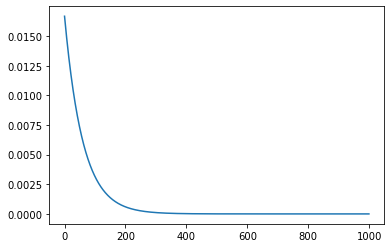

In [102]:
plt.plot(days, probability_at_day)

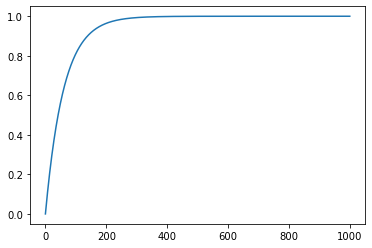

In [104]:
days = range(0, 1000)
cumulative_probabilities = [stats.expon.cdf(d, scale = 60) for d in days]
plt.plot(cumulative_probabilities)

Wie gross ist die Wahrscheinlichkeit, dass der Widerstand höchstens 30 Tage funktioniert? Wie gross ist die Wahrscheinlichkeit, dass der Widerstand mindestens 120 Tage und höchstens 150 Tage funktioniert? Visualisieren Sie die beiden Wahrscheinlichkeiten im folgenden Plot der Dichtefunktion durch Schraffieren und berechnen Sie die exakten Werte.

In [107]:
prob_max_30_d = stats.expon.cdf(30, scale = 60)
prob_max_30_d

0.3934693402873666

In [110]:
prob_at_least_120_d_max_150_d = stats.expon.sf(120, scale = 60) - stats.expon.sf(150, scale = 60)
prob_at_least_120_d_max_150_d

0.0532502846127139

(d) Berechnen Sie, wie lange es dauert, bis die Hälfte der Bauteile kaputt ist.

In [113]:
print('it takes', stats.expon.ppf(0.5, scale = 60),  'days!')

it takes 41.58883083359672 days!


(e) Lesen Sie aus der gegebenen Verteilungsfunktion ab, wann 80% der Bauteile kaputt sind und zeichnen Sie ein, wie Sie das Resultat erhalten.

In [114]:
print('it takes', stats.expon.ppf(0.8, scale = 60),  'days!')

it takes 96.56627474604603 days!
